In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import odeint
from matplotlib import gridspec
import time
from ipywidgets import widgets
%matplotlib inline

In [57]:
#funcion pedida en pregunta 1
def F(x):
    return np.array([(x[1]**2 - x[0]**3), x[0]**2 + x[1]**2 - 1])
#jacobiano de la funcion
def F_p(x):
    return np.array([[(-3*x[0]**2), 2*x[1]],[2*x[0], 2*x[1]]])

#inicial guess
x_0 = np.array([1,1])

#calculamos la matriz jacobiana
B_0 = F_p(x_0)

#definimos la funcion de broyden
def broyden(F,x_inicial,B_inicial):
    tol = 1e-7
    x0 = x_inicial
    B0 = B_inicial
    x_i = x0
    B_i = B0
    g_i = 1
    #si la norma de g_i es mayor que una tolerancia, entonces se termina el while y se retorna x_i.
    while((np.linalg.norm(g_i)>tol)):
        x_i_anterior = x_i
        #aqui actualizamos el vector x_i
        x_i = x_i - np.dot(B_i,F(x_i))
        g_i = x_i - x_i_anterior
        d_i = F(x_i) - F(x_i_anterior)
        #aqui actualizamos la matriz B_i
        B_i = B_i + (1/(np.dot(np.dot(np.transpose(g_i),B_i),d_i)))*np.dot(np.dot((g_i - np.dot(B_i,d_i)),np.transpose(g_i)),B_i)
        #si el absoluto de esta funcion es menor que una tolerancia, nos retornara x_i
        if(abs(np.dot(np.dot(np.transpose(g_i),B_i),d_i)) < 1e-15):
            return x_i
    return x_i

#comparamos nuestro resultado con lo proporcionado por la biblioteca de scipy
x1 = scipy.optimize.broyden2(F, x_0, f_tol=1e-14)
print("Resultado real: ")
print(x1)
print("\n")
#print("Resultado mio:")
#x2 = broyden(F,x_0,B_0)
#print(x2)
print("me converti en lo que jure destruir")

Resultado real: 
[ 0.75487767  0.65586562]


me converti en lo que jure destruir


In [66]:
#Definimos las ecuaciones diferenciales planteadas en el enunciado
def F(y,a,b):
    return np.array([-b*y[0]*y[1],b*y[0]*y[1] - a*y[1],a*y[1]])
    
#resolvemos el problema con el metodo de euler, pasandole los 3 initial guess y2,y5 e y7.
def solve_buckling_ring(y2,a,b):
    xi = [763,y2,0]
    #discretizamos el espacio en 200 puntos de 0 a pi/2, ya que conocemos los valores en ese extremo.
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        #definimos un h pequeño, el cual sera los espacios entre punto y punto de nuestra discretización.
        h = time_grid[i+1] - time_grid[i]
        #actualizamos el vector con el metodo de euler.
        xi = xi + h*F(xi,a,b)
    #retornamos los 3 valores en pi/2    
    return xi[0]

In [67]:
initial_guess = 100

solx = solve_buckling_ring(initial_guess,0.4477,0.0022)
print(solx)
#values = [initial_guess]
def g(x):
    return(solve_buckling_ring(x,0.4477,0.0022) - 21)

x1 = scipy.optimize.broyden2(g,initial_guess)
print(x1)

10.833961409
1.1289067177665875


In [70]:
def solve_buckling_ring_graphic_1(y2,a,b):
    x = []
    y_1 = []
    y_2 = []
    y_3 = []
    xi = np.array([763,y2,0])
    eje_x = 0
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_1.append(xi[0])
        y_2.append(xi[1])
        y_3.append(xi[2])
        xi = xi + h*F(xi,a,b)
    print(y_1[len(y_1)-1])
    print(y_2[len(y_2)-1])
    print(y_3[len(y_3)-1])
    # grafico mitad de arco con p = 0
    fig = plt.figure(figsize=(12, 6)) 
    plt.plot(x, y_1,'-y' ,label = 'suceptible')
    plt.hold(True)
    plt.plot(x, y_2,'-b', label = 'infectado')
    plt.hold(True)
    plt.plot(x, y_3,'-g', label = 'resistente')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Avance de la poblacion",fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.xlim(min(x)-50,max(x) + 50)
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    plt.tight_layout()
    plt.show()

1.1289067177665875
21.0781741643
23.9625177361
719.088214817


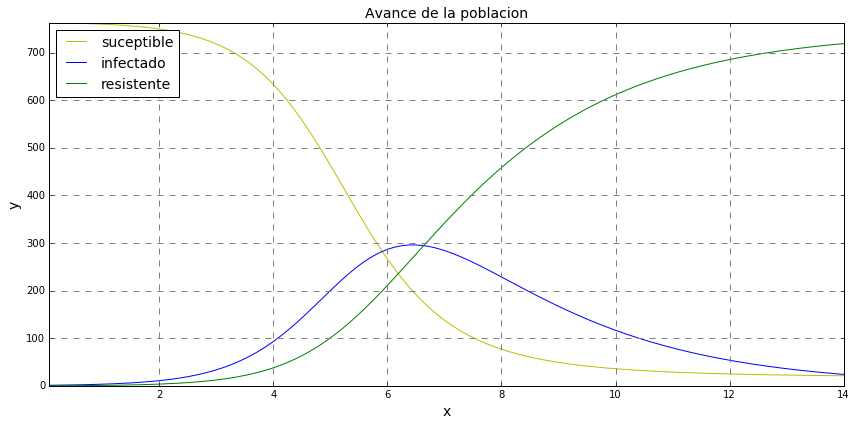

In [71]:
print(x1)
solve_buckling_ring_graphic_1(x1,0.4477,0.0022)

valores iniciales y finales:

$$S(0) = 763,\mbox{ }  S(14) = 21.2$$

$$I(0) = 1, \mbox{ } I(14) = 24.99$$

$$R(0) = 0, \mbox{ } R(14) = 717.78$$

0.0015300000000000001
294.4845960174994
21.0103288711
4.56723739029
1031.90702976


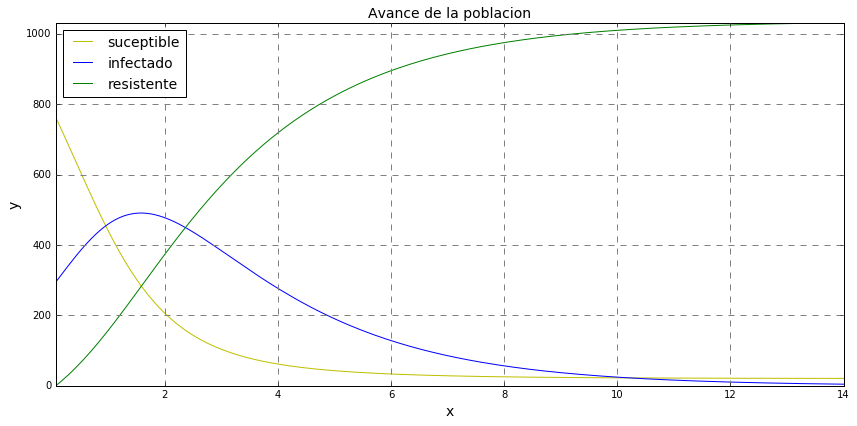

In [72]:
def diferent_a_b_graphic(b):    
    print(b/1000)

    initial_guess = 1

    solx = solve_buckling_ring(initial_guess,0.4477,(b/1000))
    
    def g2(x):
        return(solve_buckling_ring(x,0.4477,b/1000) - 21)

    x1 = scipy.optimize.broyden2(g2,initial_guess)
    print(x1)
    solve_buckling_ring_graphic_1(x1,0.4477,b/1000)

dp = 0.03
widgets.interact(diferent_a_b_graphic,b=(1.5,2.2,dp))

# def F_a_b(y,a,b):
    return np.array([-b*y[0]*y[1],b*y[0]*y[1] - a*y[1],a*y[1]])
    
#resolvemos el problema con el metodo de euler, pasandole los 3 initial guess y2,y5 e y7.
def solve_buckling_ring_a_b(y):
    xi = [763,y[0],0]
    #discretizamos el espacio en 200 puntos de 0 a pi/2, ya que conocemos los valores en ese extremo.
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        #definimos un h pequeño, el cual sera los espacios entre punto y punto de nuestra discretización.
        h = time_grid[i+1] - time_grid[i]
        #actualizamos el vector con el metodo de euler.
        xi = xi + h*F_a_b(xi,y[1],y[2])
    #retornamos los 3 valores en pi/2    
    return np.array([xi[2],y[1],y[2]])
#:(

initial_guess = 10
a_1 = 0.3
b_1 = 0.003
values = [initial_guess,a_1,b_1]
solx = solve_buckling_ring_a_b(values)
#print(solx)
#values = [initial_guess]
def g_a_b(valuesxz):
    wacho = solve_buckling_ring_a_b(valuesxz)
    print("el wacho vale \n")
    print(wacho)
    return(wacho - [700,0.3,0.003])

x_prueba = scipy.optimize.fsolve(g_a_b,values,xtol = 1e-5)
#x_br = scipy.optimize.broyden2(g_a_b,values,f_tol=0)
print("x prueba vale \n")
print(x_prueba)

In [73]:
def solve_buckling_ring_graphic_2(y):
    x = []
    y_1 = []
    y_2 = []
    y_3 = []
    xi = np.array([763,y[0],0])
    eje_x = 0
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_1.append(xi[0])
        y_2.append(xi[1])
        y_3.append(xi[2])
        xi = xi + h*F_a_b(xi,y[1],y[2])
    print(y_1[len(y_1)-1])
    print(y_2[len(y_2)-1])
    print(y_3[len(y_3)-1])
    # grafico mitad de arco con p = 0
    fig = plt.figure(figsize=(12, 6)) 
    plt.plot(x, y_1,'-y' ,label = 'suceptible')
    plt.hold(True)
    plt.plot(x, y_2,'-b', label = 'infectado')
    plt.hold(True)
    plt.plot(x, y_3,'-g', label = 'resistente')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Avance de la poblacion",fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.xlim(min(x)-50,max(x) + 50)
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    plt.tight_layout()
    plt.show()

In [74]:
lala = [  7.49362119e+02  ,0.3,0.003]
solve_buckling_ring_graphic_1(x1)
solve_buckling_ring_graphic_2(lala)

TypeError: solve_buckling_ring_graphic_1() missing 2 required positional arguments: 'a' and 'b'

In [65]:
dp = 0.00003
widgets.interact(diferent_a_b_graphic,c=(0.0015,0.0022,dp))

ValueError: cannot find widget or abbreviation for argument: 'b'